In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from datetime import datetime
import rqdatac as rq
from rqdatac import *

In [43]:
rq.init('18811472509','dennis19940821')
rq.user.get_quota()

E:\anaconda3\lib\site-packages\rqdatac\client.py:197: UserWarning: rqdatac is already inited. Settings will be changed.
  warnings.warn("rqdatac is already inited. Settings will be changed.", stacklevel=0)


{'bytes_used': 10503100,
 'bytes_limit': 52428800.0,
 'remaining_days': 13,
 'license_type': 'TRIAL'}

In [44]:
data = futures.get_dominant_price('RB',
                           start_date='2014-02-01',
                           end_date='2015-12-31',
                           frequency='1d',
                           fields=['open', 'close'],
                           adjust_type='pre', 
                           adjust_method='open_ratio')

In [70]:
OLD_PATH = 'D:/data_new'
NEW_PATH = 'D:/data_3part_consecutive_by_name'
NEW_RAW_PATH = 'D:/data_1min_new'
OPEN_NAME = 'index_open.csv'
CLOSE_NAME = 'index_close.csv'

In [71]:
old_close = pd.read_csv(os.path.join(OLD_PATH, OPEN_NAME),
                       index_col = [0,1],
                      parse_dates=True)
old_part_close = old_close['RB'].groupby(level=0).first()

In [72]:
new_close = pd.read_csv(os.path.join(NEW_PATH, OPEN_NAME),
                       index_col = [0,1],
                        parse_dates=True)
new_part_close = new_close['RB'].groupby(level=0).first()

<AxesSubplot:>

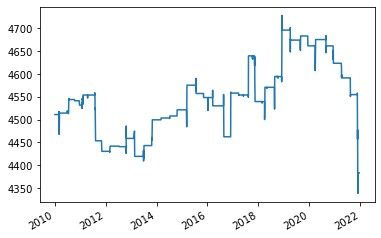

In [73]:
(new_part_close/old_part_close).plot()

In [74]:
data_copy = data.copy(deep=True)
data_copy = data_copy.droplevel(level=0)
data_copy.index = pd.to_datetime(data_copy.index)

<AxesSubplot:>

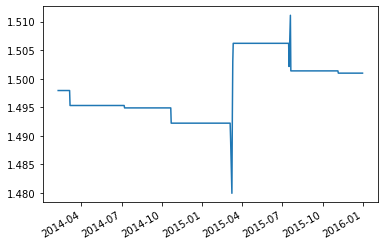

In [75]:
(new_part_close/data_copy['open']).plot()

<AxesSubplot:xlabel='date'>

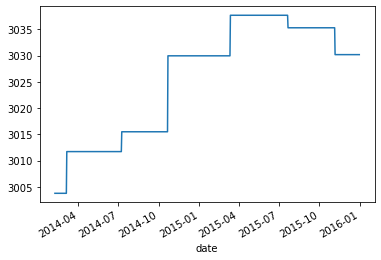

In [76]:
(data_copy['open']/old_part_close).plot()

In [16]:
data_contrast = futures.get_dominant_price('RB',
                           start_date='2014-02-01',
                           end_date='2015-12-31',
                           frequency='1d',
                           fields=['open', 'close'],
                           adjust_type='pre', 
                           adjust_method='prev_close_ratio')

In [17]:
data_copy1 = data_contrast.copy(deep=True)
data_copy1 = data_copy1.droplevel(level=0)
data_copy1.index = pd.to_datetime(data_copy1.index)

<AxesSubplot:xlabel='date'>

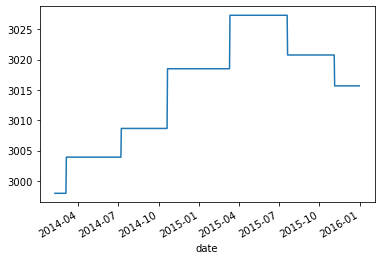

In [18]:
(data_copy1['close']/old_part_close).plot()

<AxesSubplot:>

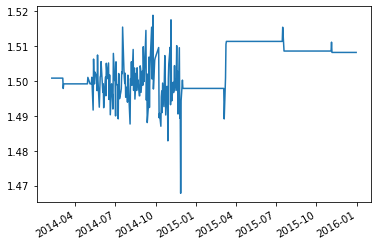

In [19]:
(new_part_close/data_copy1['close']).plot()

In [21]:
rb_inst = futures.get_ex_factor(underlying_symbols='RB', 
                              start_date='2014-02-01', 
                              end_date='2015-12-31',
                              adjust_method='open_ratio',
                              market='cn')

In [22]:
rb_inst

,underlying_symbol,ex_factor,ex_end_date,ex_cum_factor
ex_date,,,,
2014-03-05,RB,0.971596,2014-07-07,0.756746
2014-07-08,RB,0.995471,2014-10-20,0.753318
2014-10-21,RB,1.022597,2015-03-11,0.770341
2015-03-12,RB,0.958367,2015-07-20,0.738269
2015-07-21,RB,0.982890,2015-11-04,0.725637
2015-11-05,RB,0.999439,2016-03-13,0.725230


In [66]:
NEW_NOFQ_PATH = 'D:/data_3part_no_fq_by_name'
new_nofq_close = pd.read_csv(os.path.join(NEW_NOFQ_PATH, OPEN_NAME),
                       index_col = [0,1],
                        parse_dates=True)
new_nofq_part_close = new_nofq_close['RB'].groupby(level=0).first()

In [24]:
data_no_fq = futures.get_dominant_price('RB',
                           start_date='2014-02-01',
                           end_date='2015-12-31',
                           frequency='1d',
                           fields=['open', 'close'],
                           adjust_type='none', 
                           )

In [25]:
data_copy2 = data_no_fq.copy(deep=True)
data_copy2 = data_copy2.droplevel(level=0)
data_copy2.index = pd.to_datetime(data_copy2.index)

<AxesSubplot:>

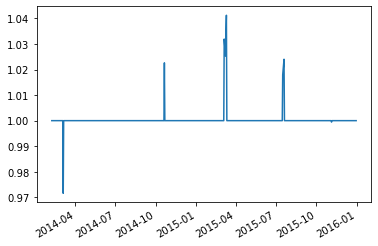

In [67]:
(new_nofq_part_close/data_copy2['open']).plot()

In [32]:
rq_domi = futures.get_dominant('RB', start_date='20140430', end_date='20140609', rule=0)
rq_domi

date
2014-04-30    RB1410
2014-05-05    RB1410
2014-05-06    RB1410
2014-05-07    RB1410
2014-05-08    RB1410
2014-05-09    RB1410
2014-05-12    RB1410
2014-05-13    RB1410
2014-05-14    RB1410
2014-05-15    RB1410
2014-05-16    RB1410
2014-05-19    RB1410
2014-05-20    RB1410
2014-05-21    RB1410
2014-05-22    RB1410
2014-05-23    RB1410
2014-05-26    RB1410
2014-05-27    RB1410
2014-05-28    RB1410
2014-05-29    RB1410
2014-05-30    RB1410
2014-06-03    RB1410
2014-06-04    RB1410
2014-06-05    RB1410
2014-06-06    RB1410
2014-06-09    RB1410
Name: dominant, dtype: object

In [33]:
data_1min_no_fq = futures.get_dominant_price('RB',
                           start_date='2014-06-09',
                           end_date='2014-06-09',
                           frequency='1m',
                           fields=['close'],
                           adjust_type='none', 
                           )

In [34]:
data_1min_no_fq

close
underlying_symbol datetime                   
RB                2014-06-09 09:01:00  3081.0
                  2014-06-09 09:02:00  3078.0
                  2014-06-09 09:03:00  3079.0
                  2014-06-09 09:04:00  3078.0
                  2014-06-09 09:05:00  3077.0
...                                       ...
                  2014-06-09 14:56:00  3062.0
                  2014-06-09 14:57:00  3062.0
                  2014-06-09 14:58:00  3064.0
                  2014-06-09 14:59:00  3065.0
                  2014-06-09 15:00:00  3068.0

[225 rows x 1 columns]

In [59]:
data_1min__no_fq = futures.get_dominant_price('RB',
                           start_date='2014-02-07',
                           end_date='2014-02-07',
                           frequency='1m',
                           fields=['open'],
                           adjust_type='none', 
                           )

In [60]:
data_1min__no_fq

open
underlying_symbol datetime                   
RB                2014-02-07 09:01:00  3448.0
                  2014-02-07 09:02:00  3435.0
                  2014-02-07 09:03:00  3436.0
                  2014-02-07 09:04:00  3433.0
                  2014-02-07 09:05:00  3435.0
...                                       ...
                  2014-02-07 14:56:00  3403.0
                  2014-02-07 14:57:00  3403.0
                  2014-02-07 14:58:00  3405.0
                  2014-02-07 14:59:00  3408.0
                  2014-02-07 15:00:00  3411.0

[225 rows x 1 columns]

In [36]:
data_copy2.loc['20140609']

open     3073.0
close    3064.0
Name: 2014-06-09 00:00:00, dtype: float64